# <u> Introduction </u>

Hello! This is a project aimed at doing an Explotary Data Analysis (Analyze and gain insights) on the dataset. 

Please excuse me if there are some methods or codes that are wrong. Thank you!

The dataset used is from Kaggle. 

Dataset Credits: https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps

My Github Repo: https://github.com/nrsfqh/Python_EDA
My Github Page: https://github.com/nrsfqh

In [1]:
# Imports
import pandas as pd
import numpy as np

#Graphs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as patches
import matplotlib.cm as cm
from tabulate import tabulate
from matplotlib.ticker import FuncFormatter
import re

In [2]:
# Reading the file

playstore_data = pd.read_csv('Google-Playstore.csv') 


## Data Exploration

In [3]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

- There are 24 columns in total.

<space>

- I believe some of the data types can be changed. For example, "Last Updated" and "Released" should be DateTime dtype. Size should be of numerical dtypes. Also, Min and Max Installs are of diff dtypes despite being about the same thing.
    
<space>
    
- Some columns will not be used to do EDA such as "Scrapped Time", "Privacy Policy", "Dev Website" and a few others columns. Hence, this columns will be dropped

In [4]:
# Display Max Columns
pd.options.display.max_columns = None  

playstore_data.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [5]:
#Check for any missing values

playstore_data.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

- Dataset has a few missing values. Will be handled further during data cleaning

In [6]:
#Checking for duplicated records -> Might have some apps that are keyed twice?

playstore_data.duplicated().value_counts()

False    2312944
dtype: int64

- Dataset has no duplicated records.

In [7]:
# Looking at Unique Values of Category

playstore_data["Category"].value_counts()

Education                  241090
Music & Audio              154906
Tools                      143988
Business                   143771
Entertainment              138276
Lifestyle                  118331
Books & Reference          116728
Personalization             89210
Health & Fitness            83510
Productivity                79698
Shopping                    75256
Food & Drink                73927
Travel & Local              67288
Finance                     65466
Arcade                      53792
Puzzle                      51168
Casual                      50813
Communication               48167
Sports                      47483
Social                      44734
News & Magazines            42807
Photography                 35552
Medical                     32065
Action                      27555
Maps & Navigation           26722
Simulation                  23282
Adventure                   23203
Educational                 21308
Art & Design                18539
Auto & Vehicle

- There are some categories which could possibly be combined such as: 
    - "Music" and "Music & Audio".
    - "Educational" and "Education.



In [8]:
playstore_data["Content Rating"].value_counts()

Everyone           2022089
Teen                196375
Mature 17+           60289
Everyone 10+         33901
Unrated                154
Adults only 18+        136
Name: Content Rating, dtype: int64

- There are 151 unrated applications. Personally, I think it's possible to combine it into the "Everyone" bracket.

<space>

- On that note, "Everyone 10+" can be changed into "Everyone". Every rating with a number can also be removed.

#### **Insights:**

1) There are 24 columns in total. Some columns will be dropped due to redundantcy.

<space>    
    
2) Some of the data types can be changed as it's incorrect ("Last Updated" and "Released", Size and Installs)
    
<space>

3) Dataset has a few missing values. 
    
<space>

4) Dataset has no duplicated records.
    
<space>
    
5) Rating can be combined.

## Data Transformation

Transformations to do: 

> Drop a few columns

> Change Dtypes

> Combine a few categories

> Combine Content Rating for "Unrated"

> Handle Missing Values


### Dropping Columns

In [9]:
# Looking at the .info()

playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [10]:
# This is just a personal choice, but I prefer if the column names has a underscore for those with two words.
# It would also be easier when doing graphs and so on later

new_cols = {col: col.replace(' ', '_') for col in playstore_data.columns}

playstore_data.rename(columns=new_cols, inplace=True)

In [11]:
# Checking
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App_Name           object 
 1   App_Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating_Count       float64
 5   Installs           object 
 6   Minimum_Installs   float64
 7   Maximum_Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum_Android    object 
 13  Developer_Id       object 
 14  Developer_Website  object 
 15  Developer_Email    object 
 16  Released           object 
 17  Last_Updated       object 
 18  Content_Rating     object 
 19  Privacy_Policy     object 
 20  Ad_Supported       bool   
 21  In_App_Purchases   bool   
 22  Editors_Choice     bool   
 23  Scraped_Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [12]:
cols_to_drop = ["App_Id", "Minimum_Android", "Developer_Id", "Developer_Website", 
                   "Developer_Email", "Privacy_Policy", "Scraped_Time"] 

playstore_data = playstore_data.drop(columns=cols_to_drop)

In [13]:
# After Dropping

playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App_Name          object 
 1   Category          object 
 2   Rating            float64
 3   Rating_Count      float64
 4   Installs          object 
 5   Minimum_Installs  float64
 6   Maximum_Installs  int64  
 7   Free              bool   
 8   Price             float64
 9   Currency          object 
 10  Size              object 
 11  Released          object 
 12  Last_Updated      object 
 13  Content_Rating    object 
 14  Ad_Supported      bool   
 15  In_App_Purchases  bool   
 16  Editors_Choice    bool   
dtypes: bool(4), float64(4), int64(1), object(8)
memory usage: 238.2+ MB


- Total columns have decreased from 24 to 17.

<space>

- Number of entries remain the same (2312944), which means now rows has been accidentally deleted.

### Change Dtypes

> I mentioned earlier that "Last_Updated" and "Released" should be DateTime dtype. 

> "Size" should be of numerical dtypes.

> Min and Max should be of same dtype

In [14]:
playstore_data.head(1)

,App_Name,Category,Rating,Rating_Count,Installs,Minimum_Installs,Maximum_Installs,Free,Price,Currency,Size,Released,Last_Updated,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False


In [15]:
# Firstly let's convert the two cols to datetime

playstore_data["Released"] = pd.to_datetime(playstore_data["Released"], format='%b %d, %Y')

playstore_data["Last_Updated"] = pd.to_datetime(playstore_data["Last_Updated"], format='%b %d, %Y')

#### Installs + Min Installs and Max Installs

- Installs should be changed to a numerical dtype instead of object.

<space>

- I think Min and Max should be standardize to the same dtype which will be integer. This is because there's no such thing as a "10.4" installs. All numbers are whole numbers.

In [16]:
# Removing non-numeric characters for Installs

playstore_data["Installs"] = playstore_data["Installs"].str.replace(r'[^0-9.]','', regex=True)

In [17]:
# Checking missing values
playstore_data["Installs"].isnull().sum()

107

- In this case, it might be possible to fill up these missing values as there is a max and min column. We could take max - min

In [18]:
# Getting the indexs of rows that contains the missing data
min_installs_missing = playstore_data[playstore_data["Installs"].isnull()]

# Select the row using .iloc[]
missing_row = min_installs_missing.iloc[1]

print(missing_row)

App_Name                   Potato Smash
Category                       Strategy
Rating                              NaN
Rating_Count                        NaN
Installs                            NaN
Minimum_Installs                    NaN
Maximum_Installs                  72087
Free                              False
Price                               0.0
Currency                            NaN
Size                                92M
Released                            NaT
Last_Updated        2021-06-11 00:00:00
Content_Rating                 Everyone
Ad_Supported                       True
In_App_Purchases                  False
Editors_Choice                    False
Name: 43569, dtype: object


In [19]:
playstore_data["Minimum_Installs"].isnull().sum()

107

In [20]:
playstore_data["Maximum_Installs"].isnull().sum()

0

- All of the missing rows contains a missing "Minimum Installs" value as well. 

<space>

- In this case, it's best to drop any missing rows as we have no way to calculate the install without the minimum installs.

In [21]:
# Drop missing vals
playstore_data = playstore_data.dropna(subset=["Installs"])

# Now we change the dtypes
# Max install is already set to integer. We just have to change min installs and installs
playstore_data["Minimum_Installs"] = playstore_data["Minimum_Installs"].astype("int64")

playstore_data["Installs"] = playstore_data["Installs"].astype("int64")


In [22]:
# Checking
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312837 entries, 0 to 2312943
Data columns (total 17 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App_Name          object        
 1   Category          object        
 2   Rating            float64       
 3   Rating_Count      float64       
 4   Installs          int64         
 5   Minimum_Installs  int64         
 6   Maximum_Installs  int64         
 7   Free              bool          
 8   Price             float64       
 9   Currency          object        
 10  Size              object        
 11  Released          datetime64[ns]
 12  Last_Updated      datetime64[ns]
 13  Content_Rating    object        
 14  Ad_Supported      bool          
 15  In_App_Purchases  bool          
 16  Editors_Choice    bool          
dtypes: bool(4), datetime64[ns](2), float64(3), int64(3), object(5)
memory usage: 255.9+ MB


- Total columns is 17.

<space>
    
- Dtypes have been changed accordingly.

### Combine Categories

> Music" and "Music & Audio".

>"Educational" and "Education".

In [23]:
# Mapping
category_changers = {
    "Music & Audio": "Music",
    "Educational": "Education"}


# Replace categories
playstore_data["Category"] = playstore_data["Category"].replace(category_changers)

In [24]:
# Check Unique Values of Category

playstore_data["Category"].value_counts()

Education                  262396
Music                      159107
Tools                      143985
Business                   143771
Entertainment              138275
Lifestyle                  118331
Books & Reference          116728
Personalization             89209
Health & Fitness            83509
Productivity                79698
Shopping                    75253
Food & Drink                73926
Travel & Local              67287
Finance                     65464
Arcade                      53789
Puzzle                      51160
Casual                      50809
Communication               48167
Sports                      47479
Social                      44730
News & Magazines            42807
Photography                 35552
Medical                     32065
Action                      27546
Maps & Navigation           26722
Simulation                  23272
Adventure                   23199
Art & Design                18537
Auto & Vehicles             18278
House & Home  

- Seems like it worked as "Music & Audio" and "Educational" no longer exists

### Combine Content Rating

In [25]:
playstore_data["Content_Rating"].value_counts()

Everyone           2022031
Teen                196344
Mature 17+           60286
Everyone 10+         33886
Unrated                154
Adults only 18+        136
Name: Content_Rating, dtype: int64

In [26]:
# Mapping
category_changers = {
    "Unrated": "Everyone",
    "Everyone 10+": "Everyone", 
    "Adults only 18+": "Adults only", 
    "Mature 17+": "Mature"}


# Replace categories
playstore_data["Content_Rating"] = playstore_data["Content_Rating"].replace(category_changers)

In [27]:
playstore_data["Content_Rating"].value_counts()

Everyone       2056071
Teen            196344
Mature           60286
Adults only        136
Name: Content_Rating, dtype: int64

### Handle Missing Values

In [28]:
#Looking at the missing values

playstore_data.isnull().sum()

App_Name                2
Category                0
Rating              22776
Rating_Count        22776
Installs                0
Minimum_Installs        0
Maximum_Installs        0
Free                    0
Price                   0
Currency               28
Size                  195
Released            70953
Last_Updated            0
Content_Rating          0
Ad_Supported            0
In_App_Purchases        0
Editors_Choice          0
dtype: int64

In [29]:
# Quickly checking the various curreny values
playstore_data["Currency"].value_counts()

USD    2311548
XXX       1236
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
RUB          1
SGD          1
AUD          1
PKR          1
ZAR          1
Name: Currency, dtype: int64

Let's analyse this logically.

1) App Name: This is data that cannot be interpreted in any way. 

<space>

2) Rating & Rating counts: Both contain 919 missing values. Similarly, it will be difficult to predict what the individual rating counts may be.

<space>
  
3) Currency: It will be hard to say for sure which currency is used based off Price alone. From the code above, there are plenty of different currencies.
     
<space>  
    
4) Released: Cannot be interpreted as well. Even if we use the Last_Updated data, there can be plenty of possible Release date for the missing values.
   
<space> 
    
5) There are 195 missing value in the size columns. These values cannot be deduced in any way nor can we use a mean value as each app is different. Hence, the best option would be to drop these missing values. This would then allow the Size dtype to be converted to float.
    
In conclusion: Most of the missing values will be difficult to determined. It would be the best option to drop all of them.

In [30]:
# Dropping missing values

playstore_data.dropna(inplace=True)

In [31]:
# Checking for missing values

playstore_data.isnull().sum()

App_Name            0
Category            0
Rating              0
Rating_Count        0
Installs            0
Minimum_Installs    0
Maximum_Installs    0
Free                0
Price               0
Currency            0
Size                0
Released            0
Last_Updated        0
Content_Rating      0
Ad_Supported        0
In_App_Purchases    0
Editors_Choice      0
dtype: int64

- As it is all null, all missing values have been dropped. We can now proceed to the last transformation.

#### Size

- Now, for "Size", the reason it is listed as objects are because it contains an alphabet at the back. 

<space>
    
- For example: "10M" or "10K" or "Varies with Device"
    
<space>
    
- We should remove all strings and convert to float (as there are decimal places). However, if just remove the letters, 10M and 10K would be distinguishable. So we should also convert these to its numerical form.

In [32]:
playstore_data["Size"].info() 

<class 'pandas.core.series.Series'>
Int64Index: 2241661 entries, 0 to 2312943
Series name: Size
Non-Null Count    Dtype 
--------------    ----- 
2241661 non-null  object
dtypes: object(1)
memory usage: 34.2+ MB


In [33]:
# This functions checks if the data either has an M, K or something else entirely. 
# It will first remove the strings behind the value, change to float and multiple accordingly

def convert_to_numeric(value):
    if 'M' in value:
        value = re.sub(r'[^0-9.]', '', value)
        value = float(value) * 1000000
        return value
    elif 'K' in value:
        value = re.sub(r'[^0-9.]', '', value)
        value = float(value) * 1000
        return value
    else:
        value = re.sub(r'[^0-9.]', '0', value)
        value = float(value) 
        return value

In [34]:
# Use the function to the "Size"
playstore_data["Size"] = playstore_data["Size"].apply(convert_to_numeric)

In [35]:
# Checking
playstore_data["Size"].info() 

<class 'pandas.core.series.Series'>
Int64Index: 2241661 entries, 0 to 2312943
Series name: Size
Non-Null Count    Dtype  
--------------    -----  
2241661 non-null  float64
dtypes: float64(1)
memory usage: 34.2 MB


In [36]:
# Looking at how the dataset is
playstore_data.head(1)

,App_Name,Category,Rating,Rating_Count,Installs,Minimum_Installs,Maximum_Installs,Free,Price,Currency,Size,Released,Last_Updated,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice
0,Gakondo,Adventure,0.0,0.0,10,10,15,True,0.0,USD,10000000.0,2020-02-26,2020-02-26,Everyone,False,False,False


- As we can see, the total enteries remains the space, and the Dtype is now float.

<space>
    
- Now, we can move onto Visualisation.

## Visualisation

> Top 10 Rated Apps

> Top 10 Categories with most installs

> Ad Supported and In-App Purchases? Do they have more installs, etc...

> Free vs Paid apps that contains Ad Supported and In-App Purchases

> Ratings of Free vs Paid apps

> Ratings of Different Categories (Top 5, Bottom 5)

> Editor's Choice: Free vs Paid Apps

### Top Rated Apps


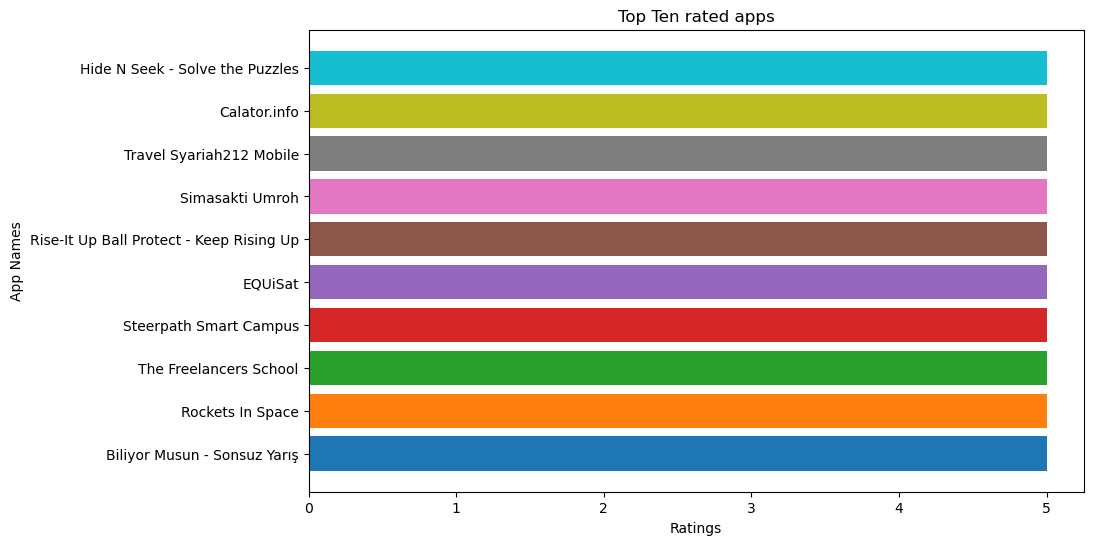

In [37]:
# Sort ratings in descending order
desc_rating = playstore_data.sort_values(by="Rating", ascending=False)

# There's going to be lots of values, so let's just show the top 10
top_ten_apps = desc_rating.head(10)

# Set the figure size
plt.figure(figsize=(10, 6))

# Bar Colours
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot the bar graph
bars = plt.barh(top_ten_apps["App_Name"], top_ten_apps["Rating"], color=bar_colors)

# Title
plt.title("Top Ten rated apps")

# x-axis
plt.xlabel("Ratings")

# y-axis
plt.ylabel("App Names")
    
# Display the plot
plt.show()


In [38]:
# Remove index values
top_ten_apps.reset_index(drop=True, inplace=True)

# Display top rated apps and its categories using tabulate
table = tabulate(top_ten_apps[['App_Name', 'Category']], headers='keys', tablefmt='pretty')

print(table)

+---+------------------------------------------+----------------+
|   |                 App_Name                 |    Category    |
+---+------------------------------------------+----------------+
| 0 |       Biliyor Musun - Sonsuz Yarış       |     Trivia     |
| 1 |             Rockets In Space             |     Arcade     |
| 2 |          The Freelancers School          |   Education    |
| 3 |          Steerpath Smart Campus          |     Tools      |
| 4 |                 EQUiSat                  |   Education    |
| 5 | Rise-It Up Ball Protect - Keep Rising Up |     Casual     |
| 6 |             Simasakti Umroh              | Travel & Local |
| 7 |         Travel Syariah212 Mobile         | Travel & Local |
| 8 |               Calator.info               | Travel & Local |
| 9 |     Hide N Seek - Solve the Puzzles      |     Puzzle     |
+---+------------------------------------------+----------------+


#### **Insights:**

- All of them have a rating of 5.0


    



### Top 10 Categories with most installs

> There's too many categories so let's just look at the top 10

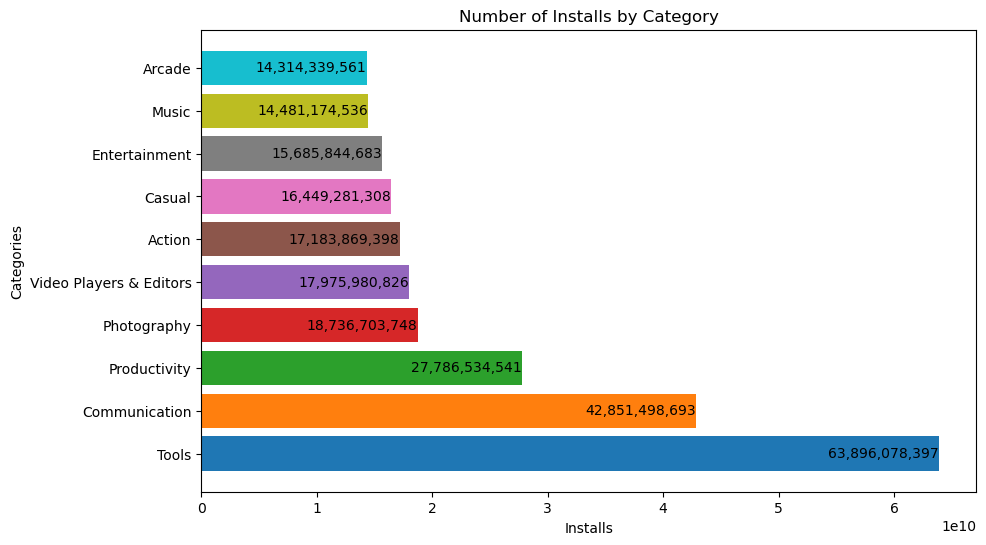

In [39]:
# Grouping the data and calculating total installs per category
category_installs = playstore_data.groupby("Category")["Installs"].sum()

# Sort in descending order
desc_installs = category_installs.sort_values(ascending=False)

# There's going to be lots of values, so let's just show the top 10
top_ten_catg_installs = desc_installs.head(10)

# Set the figure size
plt.figure(figsize=(10, 6))

# Bar Colours
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot the bar graph
bars = plt.barh(top_ten_catg_installs.index, top_ten_catg_installs, color = bar_colors)

# Title
plt.title("Number of Installs by Category")

# x-axis
plt.xlabel("Installs")

# y-axis
plt.ylabel("Categories")

# To show value on top of bar graph. Loop through the patches and annotate the bars. 
for i, value in enumerate(top_ten_catg_installs):
    plt.text(value, i, f'{value:,}',  ha="right", va="center")
    
# Display the plot
plt.show()


#### **Insights:**

- The category with the most installs is Tools (26 Billion). It is almost double of Actions (14 Billion). 

<space>

- Cateogry with least installs is Education is (9 Billion).

<space>
    
    
- Other than Tools, the next popular categories with most installs are "Action", "Casual", "Arcade" and "Entertainment". These all might be associated with Gaming applications which is very popular in the Playstore.

<space>    
    
- Education category has lower installs compared to other categories.

<space>




### Ad Supported and In-App Purchases? 

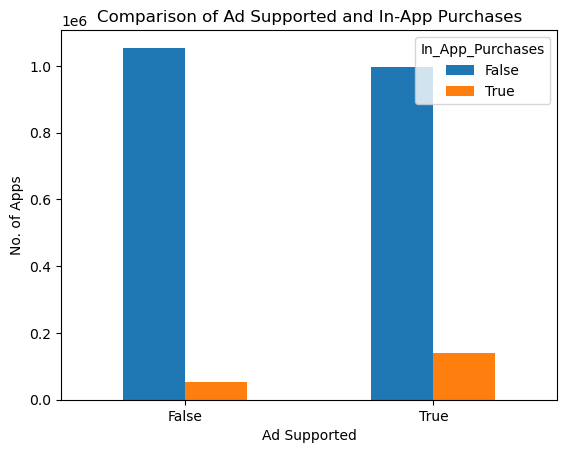

In [40]:
# Group the data by Ad_Supported and In_App_Purchaseses
# .size -> count | .unstack -> pivot data so it's easier to display
grouped_data = playstore_data.groupby(["Ad_Supported", "In_App_Purchases"]).size().unstack()

# Create Clustered Bar Chart
grouped_data.plot(kind="bar", stacked=False)

# Title
plt.title("Comparison of Ad Supported and In-App Purchases")

# x-axis
plt.xlabel("Ad Supported")
plt.xticks(rotation=0)

# y-axis
plt.ylabel("No. of Apps")
    
# Display the plot
plt.show()


#### **Insights:**

- Firstly, it seems there are not a lot of apps which contains in-app purchases in the dataset.

<space>

- However, for apps that are Ad supported (on the right), there's a more amount of apps that also includes in app purchases. A reason behind this could be that the developer wants more revenue. A common tactic by Ad Supported Apps would be to include purchases that removes the apps.

<space>

- For apps that are not ad supported (on the left), there's a smaller amount of apps that contains in app purchases.


### Free vs Paid apps that contains Ad Supported and In-App Purchases

> Further building on the graph above

In [41]:
# Looking at the column Free, it only has T or F

playstore_data['Free'].value_counts()

True     2197466
False      44195
Name: Free, dtype: int64

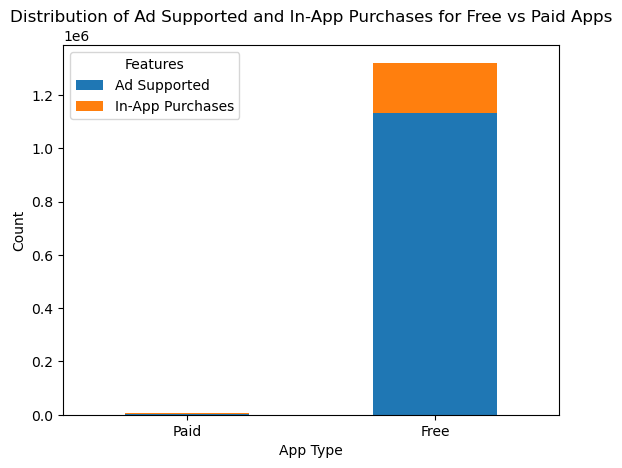

In [42]:
# Group Free Apps
# Count total amt of Ad Supported and In App Purchases
free_data = playstore_data.groupby(["Free"])[["Ad_Supported", "In_App_Purchases"]].sum()

# Plot the bar chart
free_data.plot(kind="bar", stacked=True)

# Title
plt.title("Distribution of Ad Supported and In-App Purchases for Free vs Paid Apps")

# x-axis
plt.xlabel("App Type")
plt.xticks([0, 1], ["Paid", "Free"], rotation=0)

# y-axis
plt.ylabel("Count")

# Show the chart
plt.legend(title="Features", loc="upper left", labels=["Ad Supported", "In-App Purchases"])

# Display the plot
plt.show()



#### **Insights:**

- As we can see, there are a little paid apps which are ad supported or contains in app purchases. This makes sense as paid apps generally include an ad-free experience as the users have already paid for the app.

<space>

- However, for apps that are free, majority of it are ad supported and a few contains in app purchases as well.

### Boxplot of Free vs Paid apps with Ratings

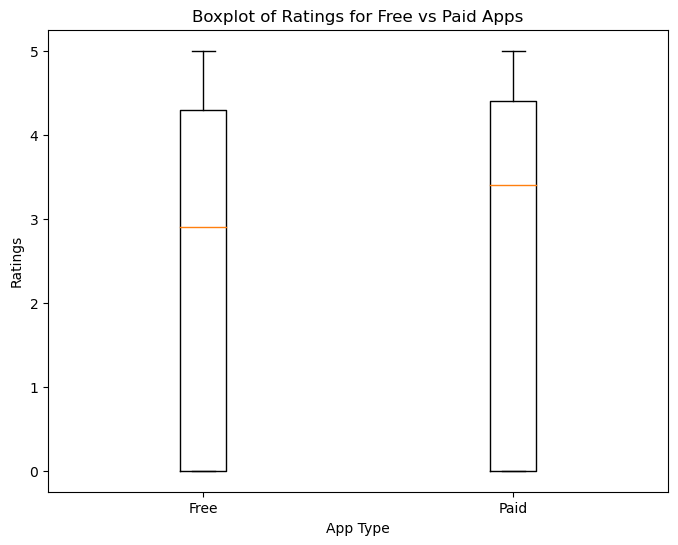

In [43]:
# Create a boxplot comparing ratings of free and paid apps

# Set the figure size
plt.figure(figsize=(8, 6))

# Box plot
# Firstly, we retrieve ratings from where Apps = Free
# Do the same but with Apps = Paid (in this case it's ~playstore_data[Free])
plt.boxplot([playstore_data[playstore_data["Free"]]["Rating"], 
             playstore_data[~playstore_data["Free"]]["Rating"]],
            labels=["Free", "Paid"])

# Title
plt.title('Boxplot of Ratings for Free vs Paid Apps')

# x-axis
plt.xlabel("App Type")

# y-axis
plt.ylabel("Ratings")

# Display the plot
plt.show()

#### **Insights:**

- Apps that are Paid have a higher ratings than the Free ones. A possible reason is because paid apps are more polished and are of better quality than free apps. Hence, user enjoys these experiece and gives it a high rating.


### Ratings of Different Categories (Top 5, Bottom 5) 

In [44]:
# This code is simillar to the one used previously
# If we want the top and bottom 5, we need to group it, then split it respectively

# Grouping the data and calculating total installs per category
category_installs = playstore_data.groupby("Category")["Installs"].sum()

# Sort ratings in descending order
desc_installs = category_installs.sort_values(ascending=False)
ascs_installs = category_installs.sort_values(ascending=True)

# Top 5 of each
top_five_catg_installs = desc_installs.head(5)
bottom_five_catg_installs = ascs_installs.head(5)

# Get the categories for the top and bottom 5 groups
top_five_cats = top_five_catg_installs.index
bottom_five_cats = bottom_five_catg_installs.index


In [45]:
# Checking to see if the codes are on the right tracks

# Shows index (only categories)
print("Top 5 Categories: ", (top_five_cats), "\n")

# Shows category and number
print( top_five_catg_installs)

Top 5 Categories:  Index(['Tools', 'Communication', 'Productivity', 'Photography',
       'Video Players & Editors'],
      dtype='object', name='Category') 

Category
Tools                      63896078397
Communication              42851498693
Productivity               27786534541
Photography                18736703748
Video Players & Editors    17975980826
Name: Installs, dtype: int64


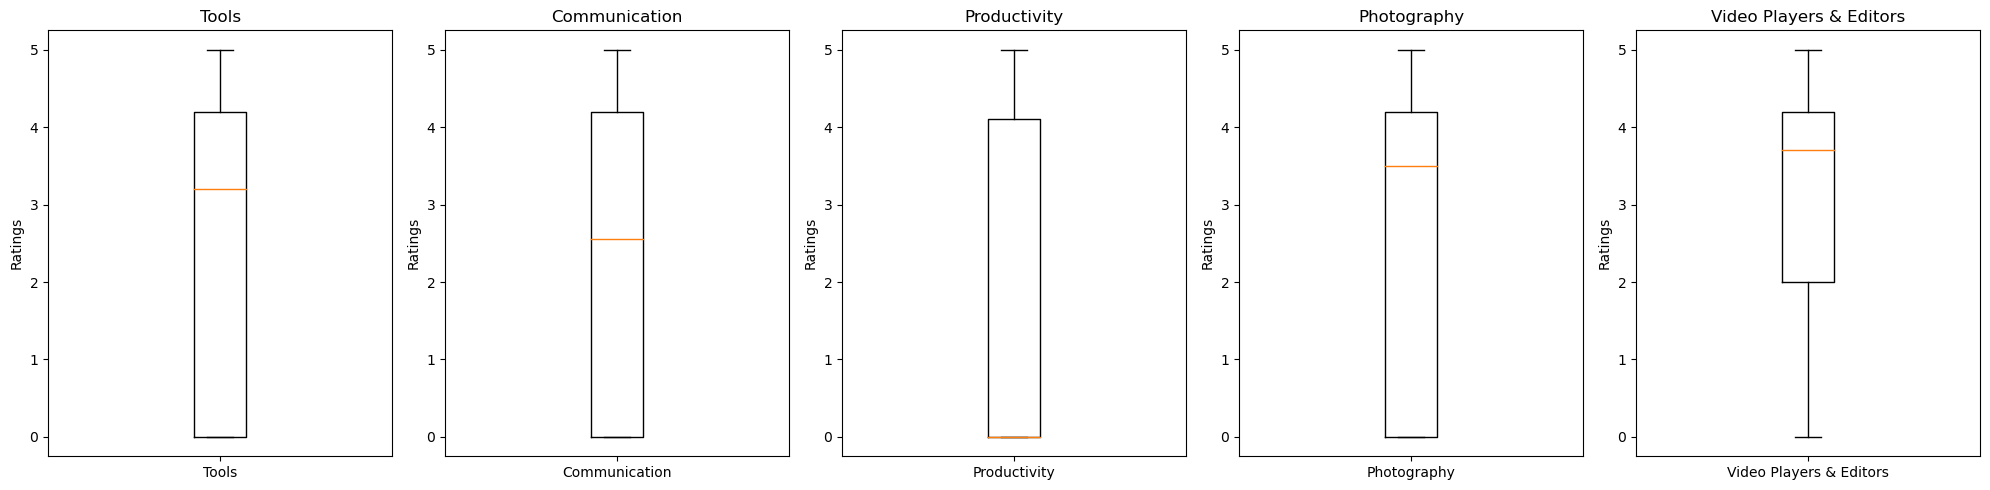

In [46]:
# Create subplots for top 5 categories
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, category in enumerate(top_five_cats):
    ratings = playstore_data[playstore_data["Category"] == category]["Rating"]
    axes[i].boxplot(ratings, labels=[category])
    axes[i].set_title(category)
    axes[i].set_ylabel("Ratings")

plt.tight_layout()
plt.show()



#### **Insights:**

- Video Players & Editors has the highest rating, followed by: Photography, Tools, Communication and Productivity


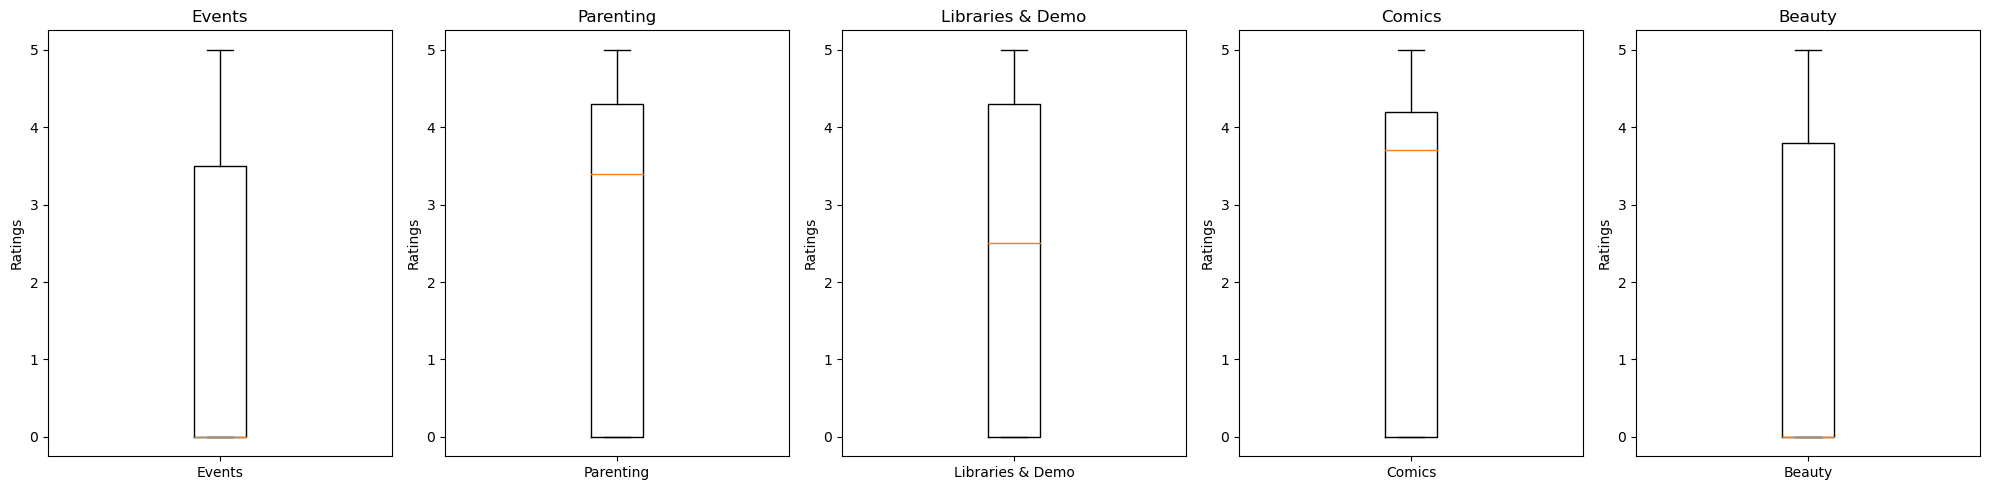

In [47]:
# Create subplots for bottom 5 categories
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, category in enumerate(bottom_five_cats):
    ratings = playstore_data[playstore_data["Category"] == category]["Rating"]
    axes[i].boxplot(ratings, labels=[category])
    axes[i].set_title(category)
    axes[i].set_ylabel("Ratings")

plt.tight_layout()
plt.show()

#### **Insights:**

- Comics has the highest rating, followed by: Parenting, Libaries & Demo, Events and Beauty


### Distributions of Installs and the App Size

In [48]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241661 entries, 0 to 2312943
Data columns (total 17 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App_Name          object        
 1   Category          object        
 2   Rating            float64       
 3   Rating_Count      float64       
 4   Installs          int64         
 5   Minimum_Installs  int64         
 6   Maximum_Installs  int64         
 7   Free              bool          
 8   Price             float64       
 9   Currency          object        
 10  Size              float64       
 11  Released          datetime64[ns]
 12  Last_Updated      datetime64[ns]
 13  Content_Rating    object        
 14  Ad_Supported      bool          
 15  In_App_Purchases  bool          
 16  Editors_Choice    bool          
dtypes: bool(4), datetime64[ns](2), float64(4), int64(3), object(4)
memory usage: 248.0+ MB


In [49]:
playstore_data["Size"].head(4)

0    10000000.0
1     2900000.0
2     3700000.0
3     1800000.0
Name: Size, dtype: float64

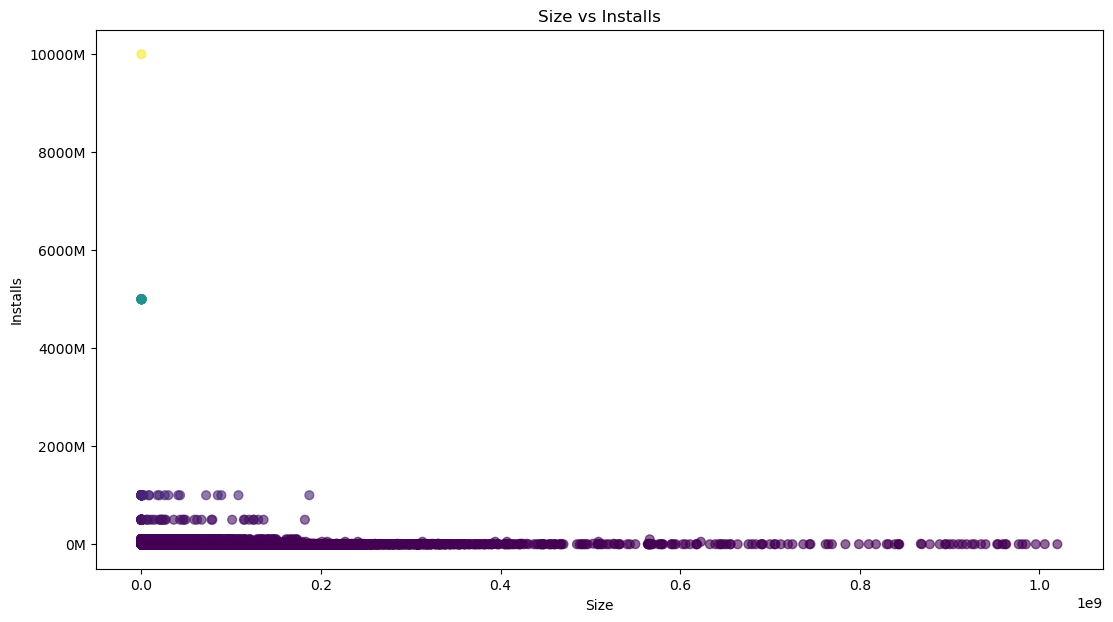

In [50]:
# Plot Adjustment
plt.figure(figsize=(13, 7), facecolor="white", edgecolor="black")

# Creating the Scatter plot
plt.scatter(playstore_data["Size"], playstore_data["Installs"], c=playstore_data["Installs"], cmap="viridis", s=40, alpha=0.6)

# Creating Best Fit (Regression) Line
# Need to find the coefficient first
coefficients = np.polyfit(playstore_data["Size"], playstore_data["Installs"], 1)

# Create a linear regression line
line = np.poly1d(coefficients)


# Plotting the best-fit line
#plt.plot(x_fit, y_fit, color="red", linestyle="--", linewidth=2)

# Title
plt.title("Size vs Installs")

# x-axis
plt.xlabel("Size")

# y-axis
plt.ylabel("Installs")

# Custom FuncFormatter
def millions_formatter(x, pos):
    return f'{int(x / 1000000)}M'

# Formatting Y-axis
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()


#### **Insights:**

- Firstly, keep in mind that I had already convereted the Size column to numerical value during Data Transformation.

<space>

- Most apps, regardless of size have a standard installs counts around 1.5M installs. However there are certain outliers in which appilication with sizes close to 0.0 have large amounts of installs. 
    
<space>

- Of course, an application cannot simply be 0.0, so these could also be the result of the "Varies with device" which was converted to zero during the data transformation phase.


## Editor's Choice: Free vs Paid Apps

In [51]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241661 entries, 0 to 2312943
Data columns (total 17 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App_Name          object        
 1   Category          object        
 2   Rating            float64       
 3   Rating_Count      float64       
 4   Installs          int64         
 5   Minimum_Installs  int64         
 6   Maximum_Installs  int64         
 7   Free              bool          
 8   Price             float64       
 9   Currency          object        
 10  Size              float64       
 11  Released          datetime64[ns]
 12  Last_Updated      datetime64[ns]
 13  Content_Rating    object        
 14  Ad_Supported      bool          
 15  In_App_Purchases  bool          
 16  Editors_Choice    bool          
dtypes: bool(4), datetime64[ns](2), float64(4), int64(3), object(4)
memory usage: 248.0+ MB


In [52]:
# Checking Editor's Choice counts -> Only 649 enteries have it
playstore_data["Editors_Choice"].value_counts()

False    2240876
True         785
Name: Editors_Choice, dtype: int64

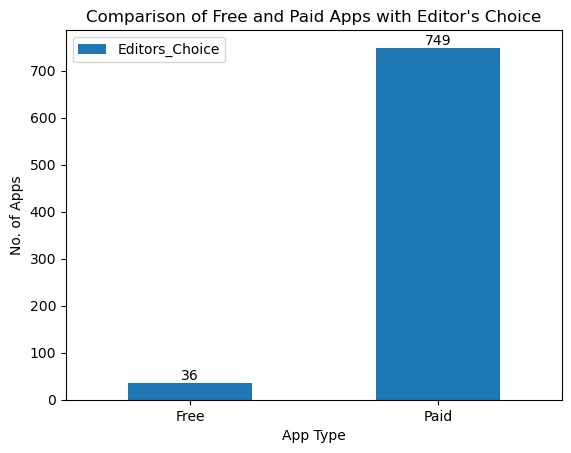

In [53]:
# Group the data by Free and Editors_Choice
free_edata = playstore_data.groupby(["Free"])[["Editors_Choice"]].sum()

# Create Clustered Bar Chart
ax = free_edata.plot(kind="bar", stacked=False)

# Title
plt.title("Comparison of Free and Paid Apps with Editor's Choice")

# x-axis
plt.xlabel("App Type")
plt.xticks([0, 1], ["Free", "Paid"], rotation=0)

# y-axis
plt.ylabel("No. of Apps")

# To show value on top of bar graph. Loop through the patches and annotate the bars. 
for i, value in enumerate(free_edata["Editors_Choice"]):
    ax.text(i, value, str(value), ha="center", va="bottom")
    
# Display the plot
plt.show()


#### **Insights:**

- A significant amount of Apps that have an Editor's Choice are paid apps (617). However, there are also 32 Free apps which received it.


## Ratings of Apps that recieved an Editor's Choice

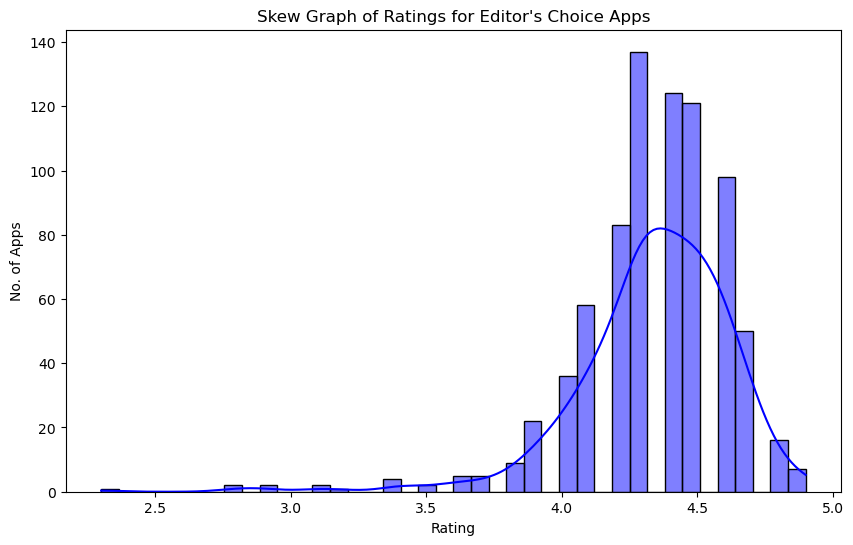

In [54]:
# Filter the data by Editors_Choice is equals to True
ec_data = playstore_data[playstore_data["Editors_Choice"] == True]

# Create a skew graph
plt.figure(figsize=(10, 6))

sns.histplot(ec_data["Rating"], kde=True, color="blue")

# Title
plt.title("Skew Graph of Ratings for Editor's Choice Apps")

# x-axis
plt.xlabel("Rating")

# y-axis
plt.ylabel("No. of Apps")
    
# Display the plot
plt.show()


#### **Insights:**

- Majority of the Apps that recieved an Editors Choice are on the higher end of the rating scale (between the ratings of 4.0 and 4.8). This makes sense as apps that have a higher ratings, suggest that users have a good experience with using the apps.

<space>

- However, there are also certain outliers. Apps that have a lower rating such a 1.0 or 2.8, but still managing to recieve an Editors Choice.

## Conclusion

#### Category Insights:

- The category with the most installs is "Tools" with 26 billion, almost double that of "Action" with 14 billion installs. 

<space>

- Categories like "Action," "Casual," "Arcade," and "Entertainment" also has high installs, which might be associated with Gaming applications in the Playstore.
    
<space>

- "Education" stands out as having the least installs at 9 billion, suggesting lower popularity compared to other categories.

#### In-App Purchases:
  
- Free apps, especially those that are ad-supported, often include in-app purchases. This might be a strategy to generate more revenue by providing a free version with ads and offering purchases to remove ads for a better user experience.
    
#### Paid Apps:
    
- Paid apps generally have higher ratings than free ones. This could be because paid apps are more polished and are of better quality than free apps. Users pay for the quality work that the developers put into making the app. Hence, user enjoys these experiece and gives it a high rating.
    
#### Editor's Choice:

- A significant number of apps receiving Editor's Choice are paid (617), but there are also 32 free apps that received this distinction.
    
<space>    
    
- Apps with Editor's Choice tend to have higher ratings (between 4.0 and 4.8). However, there are outliers with lower ratings (1.0 or 2.8) still receiving Editor's Choice, suggesting other contributing factors at play.